In [51]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [52]:
data = pd.read_csv('/Users/home/Downloads/perrin-freres-monthly-champagne-.csv')

In [53]:
data.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [54]:
data.tail()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN
106,Perrin Freres monthly champagne sales millions...,NaN


In [55]:
data.shape

(107, 2)

In [56]:
# Clean the dataset

In [57]:
data.columns=['Month','Sales']

In [58]:
data.head()

,Month,Sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [59]:
data.isnull().sum()

Month    1
Sales    2
dtype: int64

In [60]:
data[data['Sales'].isnull()]

,Month,Sales
105,NaN,NaN
106,Perrin Freres monthly champagne sales millions...,NaN


In [61]:
data.drop(index=[105,106], inplace=True)

In [62]:
data.isnull().sum()

Month    0
Sales    0
dtype: int64

In [63]:
data

,Month,Sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0
...,...,...
100,1972-05,4618.0
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0


In [64]:
data.dtypes

Month     object
Sales    float64
dtype: object

In [65]:
data['Month'] = pd.to_datetime(data['Month'])

In [66]:
data

,Month,Sales
0,1964-01-01,2815.0
1,1964-02-01,2672.0
2,1964-03-01,2755.0
3,1964-04-01,2721.0
4,1964-05-01,2946.0
...,...,...
100,1972-05-01,4618.0
101,1972-06-01,5312.0
102,1972-07-01,4298.0
103,1972-08-01,1413.0


In [67]:
data.dtypes

Month    datetime64[ns]
Sales           float64
dtype: object

In [68]:
data.set_index('Month', inplace=True)

In [69]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Sales,105.0,4761.152381,2553.502601,1413.0,3113.0,4217.0,5221.0,13916.0


In [70]:
# Vizualize the data

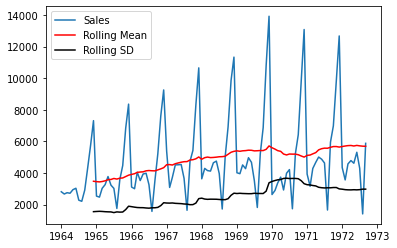

In [71]:
roll_mean = data['Sales'].rolling(12).mean()
roll_sd = data['Sales'].rolling(12).std()
plt.plot(data['Sales'], label = 'Sales')
plt.plot(roll_mean,color='r', label='Rolling Mean')
plt.plot(roll_sd, color='k', label='Rolling SD')
plt.legend()
plt.show()

In [72]:
# Seasonal Decomposition

In [73]:
from statsmodels.tsa.seasonal import seasonal_decompose

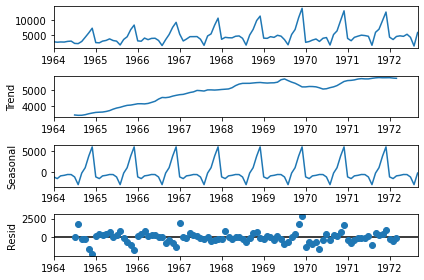

In [74]:
seasonal_decompose(data, model='additive').plot()
plt.show()

In [75]:
# Now we have to make data stationary

In [76]:
# First we have to test the stationary (adfuller-- Augmented Dickyfuller test)

In [77]:
from statsmodels.tsa.stattools import adfuller

In [78]:
# Ho: Data is not stationary
# Ha: The data is stationary

def adfuller_test(sales):
    result = adfuller(sales)
    labels = ['ADF test statistics','P- Value','# lags used','No. of observations']
    for value,label in zip(result, labels):
        print(label+':'+str(value))
    if result[1]<0.05:
        print('Accpet the Ha: data stationary')
    else:
        print('Accpet the Ho: data is not stationary')

In [79]:
adfuller_test(data['Sales'])

ADF test statistics:-1.8335930563276237
P- Value:0.3639157716602447
# lags used:11
No. of observations:93
Accpet the Ho: data is not stationary


In [80]:
# Diffrencing

In [81]:
data['Sales']

Month
1964-01-01    2815.0
1964-02-01    2672.0
1964-03-01    2755.0
1964-04-01    2721.0
1964-05-01    2946.0
               ...  
1972-05-01    4618.0
1972-06-01    5312.0
1972-07-01    4298.0
1972-08-01    1413.0
1972-09-01    5877.0
Name: Sales, Length: 105, dtype: float64

In [82]:
data['Sales'].shift(1)

Month
1964-01-01       NaN
1964-02-01    2815.0
1964-03-01    2672.0
1964-04-01    2755.0
1964-05-01    2721.0
               ...  
1972-05-01    4788.0
1972-06-01    4618.0
1972-07-01    5312.0
1972-08-01    4298.0
1972-09-01    1413.0
Name: Sales, Length: 105, dtype: float64

In [83]:
data['1st Diff']= data['Sales'] - data['Sales'].shift(1)

In [84]:
data

,Sales,1st Diff
Month,,
1964-01-01,2815.0,NaN
1964-02-01,2672.0,-143.0
1964-03-01,2755.0,83.0
1964-04-01,2721.0,-34.0
1964-05-01,2946.0,225.0
...,...,...
1972-05-01,4618.0,-170.0
1972-06-01,5312.0,694.0
1972-07-01,4298.0,-1014.0


In [85]:
data['Seasonal Diff']= data['Sales'] - data['Sales'].shift(12)

In [86]:
data

,Sales,1st Diff,Seasonal Diff
Month,,,
1964-01-01,2815.0,NaN,NaN
1964-02-01,2672.0,-143.0,NaN
1964-03-01,2755.0,83.0,NaN
1964-04-01,2721.0,-34.0,NaN
1964-05-01,2946.0,225.0,NaN
...,...,...,...
1972-05-01,4618.0,-170.0,-392.0
1972-06-01,5312.0,694.0,438.0
1972-07-01,4298.0,-1014.0,-335.0


In [87]:
adfuller_test(data['1st Diff'].dropna())

ADF test statistics:-7.189896448051012
P- Value:2.5196204473868975e-10
# lags used:11
No. of observations:92
Accpet the Ha: data stationary


In [88]:
adfuller_test(data['Seasonal Diff'].dropna())

ADF test statistics:-7.626619157213163
P- Value:2.060579696813685e-11
# lags used:0
No. of observations:92
Accpet the Ha: data stationary


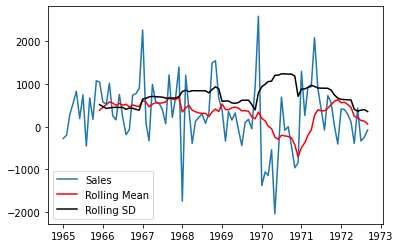

In [89]:
roll_mean = data['Seasonal Diff'].rolling(12).mean()
roll_sd = data['Seasonal Diff'].rolling(12).std()
plt.plot(data['Seasonal Diff'], label = 'Sales')
plt.plot(roll_mean,color='r', label='Rolling Mean')
plt.plot(roll_sd, color='k', label='Rolling SD')
plt.legend()
plt.show()

## Auto regression Model

In [90]:
# Auto correlation plot

In [91]:
from pandas.plotting import autocorrelation_plot

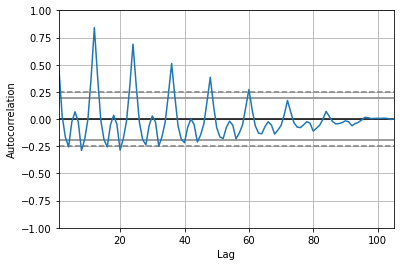

In [92]:
autocorrelation_plot(data['Sales'])
plt.show()

In [93]:
# Plot The ACF and PACF

In [94]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

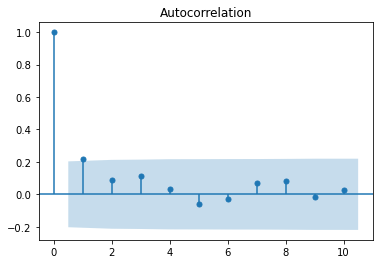

In [95]:
plot_acf(data['Seasonal Diff'].dropna(), lags=10)
plt.show()

In [96]:
# Since the taper in acf model is at 1 lag the the value of q=1

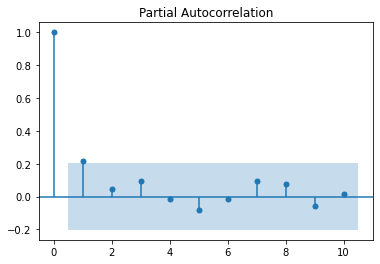

In [101]:
plot_pacf(data['Seasonal Diff'].dropna(), lags=10)
plt.show()

In [102]:
# Since the shut off of pacf model is at 1 lag the the value of p=0

In [103]:
# d = 1

In [133]:
pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 604.0/604.0 KB 11.7 MB/s eta 0:00:00a 0:00:01
You should consider upgrading via the '/Users/home/opt/anaconda3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [134]:
from pmdarima import auto_arima
a_arima = auto_arima(data['Sales'], start_p=0, start_q=0,d=1, test='adf', trace=True)
# Akaike information criterion

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1937.732, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1938.874, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1937.889, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1935.750, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.21 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.281 seconds


In [105]:
from statsmodels.tsa.arima.model import ARIMA

In [106]:
model = ARIMA(data['Sales'], order=(0,1,0))

/Users/home/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/home/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/home/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [107]:
model_fit = model.fit()

In [108]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                  105
Model:                 ARIMA(0, 1, 0)   Log Likelihood                -966.875
Date:                Wed, 15 Jun 2022   AIC                           1935.750
Time:                        16:36:20   BIC                           1938.394
Sample:                    01-01-1964   HQIC                          1936.821
                         - 09-01-1972                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      6.895e+06   5.29e+05     13.025      0.000    5.86e+06    7.93e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.86   Jarque-Bera (JB):               139.51
Prob(Q):                              0.35   Prob(JB):                         0.00
Heteroskedasticity (H):               4.62   Skew:                            -1.74
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [109]:
data

,Sales,1st Diff,Seasonal Diff
Month,,,
1964-01-01,2815.0,NaN,NaN
1964-02-01,2672.0,-143.0,NaN
1964-03-01,2755.0,83.0,NaN
1964-04-01,2721.0,-34.0,NaN
1964-05-01,2946.0,225.0,NaN
...,...,...,...
1972-05-01,4618.0,-170.0,-392.0
1972-06-01,5312.0,694.0,438.0
1972-07-01,4298.0,-1014.0,-335.0


In [110]:
data['Forecast_ARIMA'] = model_fit.predict(start=90,end=105, dynamic=True)

<AxesSubplot:xlabel='Month'>

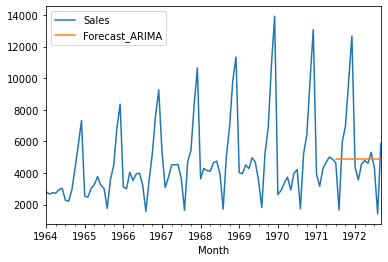

In [111]:
data[['Sales','Forecast_ARIMA']].plot()

In [112]:
data.iloc[90:105,:]

,Sales,1st Diff,Seasonal Diff,Forecast_ARIMA
Month,,,,
1971-07-01,4633.0,-241.0,416.0,4874.0
1971-08-01,1659.0,-2974.0,-79.0,4874.0
1971-09-01,5951.0,4292.0,730.0,4874.0
1971-10-01,6981.0,1030.0,557.0,4874.0
1971-11-01,9851.0,2870.0,9.0,4874.0
1971-12-01,12670.0,2819.0,-406.0,4874.0
1972-01-01,4348.0,-8322.0,414.0,4874.0
1972-02-01,3564.0,-784.0,402.0,4874.0
1972-03-01,4577.0,1013.0,291.0,4874.0


In [113]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [114]:
model_sarimax = SARIMAX(data['Sales'], order=(0,1,0), seasonal_order=(0,1,0,12))

/Users/home/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/home/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [115]:
result = model_sarimax.fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.25477D+00    |proj g|=  1.39239D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      3      6      1     0     0   1.164D-06   7.251D+00
  F =   7.2507694771598556     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


In [116]:
data['Forecast_SARIMAX'] = result.predict(start=90,end=105, dynamic=True)

<AxesSubplot:xlabel='Month'>

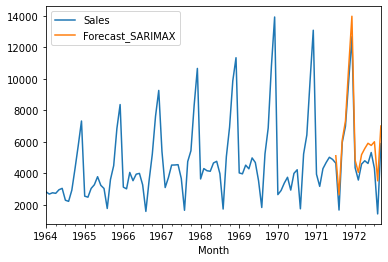

In [117]:

data[['Sales','Forecast_SARIMAX']].plot()

In [118]:
data.iloc[90:105,:]

,Sales,1st Diff,Seasonal Diff,Forecast_ARIMA,Forecast_SARIMAX
Month,,,,,
1971-07-01,4633.0,-241.0,416.0,4874.0,5105.0
1971-08-01,1659.0,-2974.0,-79.0,4874.0,2626.0
1971-09-01,5951.0,4292.0,730.0,4874.0,6109.0
1971-10-01,6981.0,1030.0,557.0,4874.0,7312.0
1971-11-01,9851.0,2870.0,9.0,4874.0,10730.0
1971-12-01,12670.0,2819.0,-406.0,4874.0,13964.0
1972-01-01,4348.0,-8322.0,414.0,4874.0,4822.0
1972-02-01,3564.0,-784.0,402.0,4874.0,4050.0
1972-03-01,4577.0,1013.0,291.0,4874.0,5174.0


In [119]:
# Forecasting

In [120]:
from pandas.tseries.offsets import DateOffset

In [121]:
future_dates = [data.index[-1]+ DateOffset(months=x) for x in range(0,24)]

In [122]:
future_dates

[Timestamp('1972-09-01 00:00:00'),
 Timestamp('1972-10-01 00:00:00'),
 Timestamp('1972-11-01 00:00:00'),
 Timestamp('1972-12-01 00:00:00'),
 Timestamp('1973-01-01 00:00:00'),
 Timestamp('1973-02-01 00:00:00'),
 Timestamp('1973-03-01 00:00:00'),
 Timestamp('1973-04-01 00:00:00'),
 Timestamp('1973-05-01 00:00:00'),
 Timestamp('1973-06-01 00:00:00'),
 Timestamp('1973-07-01 00:00:00'),
 Timestamp('1973-08-01 00:00:00'),
 Timestamp('1973-09-01 00:00:00'),
 Timestamp('1973-10-01 00:00:00'),
 Timestamp('1973-11-01 00:00:00'),
 Timestamp('1973-12-01 00:00:00'),
 Timestamp('1974-01-01 00:00:00'),
 Timestamp('1974-02-01 00:00:00'),
 Timestamp('1974-03-01 00:00:00'),
 Timestamp('1974-04-01 00:00:00'),
 Timestamp('1974-05-01 00:00:00'),
 Timestamp('1974-06-01 00:00:00'),
 Timestamp('1974-07-01 00:00:00'),
 Timestamp('1974-08-01 00:00:00')]

In [123]:
new_data = pd.DataFrame(index=future_dates[1:], columns=data.columns)

In [124]:
new_data

,Sales,1st Diff,Seasonal Diff,Forecast_ARIMA,Forecast_SARIMAX
1972-10-01,NaN,NaN,NaN,NaN,NaN
1972-11-01,NaN,NaN,NaN,NaN,NaN
1972-12-01,NaN,NaN,NaN,NaN,NaN
1973-01-01,NaN,NaN,NaN,NaN,NaN
1973-02-01,NaN,NaN,NaN,NaN,NaN
1973-03-01,NaN,NaN,NaN,NaN,NaN
1973-04-01,NaN,NaN,NaN,NaN,NaN
1973-05-01,NaN,NaN,NaN,NaN,NaN
1973-06-01,NaN,NaN,NaN,NaN,NaN
1973-07-01,NaN,NaN,NaN,NaN,NaN


In [125]:
fin_data = pd.concat([data,new_data])

In [126]:
fin_data.shape

(128, 5)

In [127]:
model_sarimax = SARIMAX(fin_data['Sales'], order=(1,1,1), seasonal_order=(1,1,1,12))

/Users/home/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/home/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [ ]:
SARIMAX.

In [128]:
result = model_sarimax.fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.80203D+00    |proj g|=  3.94498D-02

At iterate    5    f=  5.78273D+00    |proj g|=  1.25820D-02

At iterate   10    f=  5.78085D+00    |proj g|=  2.45649D-04

At iterate   15    f=  5.78081D+00    |proj g|=  4.15004D-03


 This problem is unconstrained.



At iterate   20    f=  5.77839D+00    |proj g|=  9.71392D-03

At iterate   25    f=  5.76886D+00    |proj g|=  8.71542D-04

At iterate   30    f=  5.76877D+00    |proj g|=  4.60750D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     31     34      1     0     0   1.181D-05   5.769D+00
  F =   5.7687661555303187     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


In [135]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Sales   No. Observations:                  128
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -738.402
Date:                            Wed, 15 Jun 2022   AIC                           1486.804
Time:                                    16:52:27   BIC                           1500.529
Sample:                                01-01-1964   HQIC                          1492.375
                                     - 08-01-1974                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2790      0.081      3.433      0.001       0.120       0.438
ma.L1         -0.9494      0.043    -22.334      0.000      -1.033      -0.866
ar.S.L12      -0.4544      0.303     -1.499      0.134      -1.049       0.140
ma.S.L12       0.2450      0.311      0.788      0.431      -0.365       0.855
sigma2      5.055e+05   6.12e+04      8.265      0.000    3.86e+05    6.25e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.27   Jarque-Bera (JB):                33.20
Prob(Q):                              0.60   Prob(JB):                         0.00
Heteroskedasticity (H):               0.16   Skew:                            -0.32
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.55
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [129]:
fin_data['Forecast_SARIMAX'] = result.predict(start=103, end=128,dynamic=True)

<AxesSubplot:>

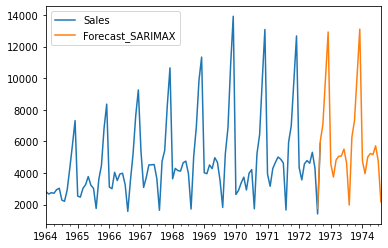

In [130]:
fin_data[['Sales','Forecast_SARIMAX']].plot()

In [131]:
fin_data.tail(30)

,Sales,1st Diff,Seasonal Diff,Forecast_ARIMA,Forecast_SARIMAX
1972-03-01,4577.0,1013.0,291.0,4874.0,NaN
1972-04-01,4788.0,211.0,112.0,4874.0,NaN
1972-05-01,4618.0,-170.0,-392.0,4874.0,NaN
1972-06-01,5312.0,694.0,438.0,4874.0,NaN
1972-07-01,4298.0,-1014.0,-335.0,4874.0,NaN
1972-08-01,1413.0,-2885.0,-246.0,4874.0,1761.633592
1972-09-01,5877.0,4464.0,-74.0,4874.0,5993.617639
1972-10-01,NaN,NaN,NaN,NaN,7073.962976
1972-11-01,NaN,NaN,NaN,NaN,10027.928648
1972-12-01,NaN,NaN,NaN,NaN,12918.586815


In [136]:
#validation

In [137]:
y_test=data['Sales'][90:]

In [138]:
y_test

Month
1971-07-01     4633.0
1971-08-01     1659.0
1971-09-01     5951.0
1971-10-01     6981.0
1971-11-01     9851.0
1971-12-01    12670.0
1972-01-01     4348.0
1972-02-01     3564.0
1972-03-01     4577.0
1972-04-01     4788.0
1972-05-01     4618.0
1972-06-01     5312.0
1972-07-01     4298.0
1972-08-01     1413.0
1972-09-01     5877.0
Name: Sales, dtype: float64

In [147]:
y_pred= data['Forecast_SARIMAX'][90:]

In [148]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_percentage_error

In [149]:
r2_score(y_test,y_pred)

0.8630992833358998

In [150]:
mean_squared_error(y_test,y_pred)

1036097.2

In [154]:
mean_absolute_percentage_error(y_test,y_pred)

0.47044199848122054

In [155]:
y_pred= data['Forecast_ARIMA'][90:]

In [156]:
r2_score(y_test,y_pred)

-0.03241905349064855

In [157]:
mean_squared_error(y_test,y_pred)

7813593.066666666

In [158]:
mean_absolute_percentage_error(y_test,y_pred)

0.47044199848122054

In [159]:
from pandas.tseries.offsets import DateOffset

In [161]:
future_dates=[data.index[-1]+ DateOffset(months=x)for x in range(0,36)]

In [162]:
future_dates

[Timestamp('1972-09-01 00:00:00'),
 Timestamp('1972-10-01 00:00:00'),
 Timestamp('1972-11-01 00:00:00'),
 Timestamp('1972-12-01 00:00:00'),
 Timestamp('1973-01-01 00:00:00'),
 Timestamp('1973-02-01 00:00:00'),
 Timestamp('1973-03-01 00:00:00'),
 Timestamp('1973-04-01 00:00:00'),
 Timestamp('1973-05-01 00:00:00'),
 Timestamp('1973-06-01 00:00:00'),
 Timestamp('1973-07-01 00:00:00'),
 Timestamp('1973-08-01 00:00:00'),
 Timestamp('1973-09-01 00:00:00'),
 Timestamp('1973-10-01 00:00:00'),
 Timestamp('1973-11-01 00:00:00'),
 Timestamp('1973-12-01 00:00:00'),
 Timestamp('1974-01-01 00:00:00'),
 Timestamp('1974-02-01 00:00:00'),
 Timestamp('1974-03-01 00:00:00'),
 Timestamp('1974-04-01 00:00:00'),
 Timestamp('1974-05-01 00:00:00'),
 Timestamp('1974-06-01 00:00:00'),
 Timestamp('1974-07-01 00:00:00'),
 Timestamp('1974-08-01 00:00:00'),
 Timestamp('1974-09-01 00:00:00'),
 Timestamp('1974-10-01 00:00:00'),
 Timestamp('1974-11-01 00:00:00'),
 Timestamp('1974-12-01 00:00:00'),
 Timestamp('1975-01-

In [164]:
new_data= pd.DataFrame(index=future_dates[1:],columns=data.columns)

In [165]:
new_data

,Sales,1st Diff,Seasonal Diff,Forecast_ARIMA,Forecast_SARIMAX
1972-10-01,NaN,NaN,NaN,NaN,NaN
1972-11-01,NaN,NaN,NaN,NaN,NaN
1972-12-01,NaN,NaN,NaN,NaN,NaN
1973-01-01,NaN,NaN,NaN,NaN,NaN
1973-02-01,NaN,NaN,NaN,NaN,NaN
1973-03-01,NaN,NaN,NaN,NaN,NaN
1973-04-01,NaN,NaN,NaN,NaN,NaN
1973-05-01,NaN,NaN,NaN,NaN,NaN
1973-06-01,NaN,NaN,NaN,NaN,NaN
1973-07-01,NaN,NaN,NaN,NaN,NaN


In [166]:
fin_data=pd.concat([data,new_data])

In [167]:
fin_data.shape

(140, 5)

In [168]:
model_sarima=SARIMAX(fin_data['Sales'],order=(1,1,1),seasonal_order=(1,1,1,12))

/Users/home/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/home/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [170]:
result=model_sarimax.fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.80203D+00    |proj g|=  3.94498D-02

At iterate    5    f=  5.78273D+00    |proj g|=  1.25820D-02

At iterate   10    f=  5.78085D+00    |proj g|=  2.45649D-04


 This problem is unconstrained.



At iterate   15    f=  5.78081D+00    |proj g|=  4.15004D-03

At iterate   20    f=  5.77839D+00    |proj g|=  9.71392D-03

At iterate   25    f=  5.76886D+00    |proj g|=  8.71542D-04

At iterate   30    f=  5.76877D+00    |proj g|=  4.60750D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     31     34      1     0     0   1.181D-05   5.769D+00
  F =   5.7687661555303187     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


In [171]:
fin_data['Forecast_SARIMAX']= result.predict(start=103,end=140,dynamic=True)

In [172]:
fin_data

,Sales,1st Diff,Seasonal Diff,Forecast_ARIMA,Forecast_SARIMAX
1964-01-01,2815.0,NaN,NaN,NaN,NaN
1964-02-01,2672.0,-143.0,NaN,NaN,NaN
1964-03-01,2755.0,83.0,NaN,NaN,NaN
1964-04-01,2721.0,-34.0,NaN,NaN,NaN
1964-05-01,2946.0,225.0,NaN,NaN,NaN
...,...,...,...,...,...
1975-04-01,NaN,NaN,NaN,NaN,5451.497022
1975-05-01,NaN,NaN,NaN,NaN,5419.382517
1975-06-01,NaN,NaN,NaN,NaN,5922.815624
1975-07-01,NaN,NaN,NaN,NaN,4998.354272


In [ ]:
fin_data([data])